# What is the True Normal Human Body Temperature? (*solution*)

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Preliminary Visual Inspection
Becoming familiar with the data:

In [1]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

print('>>> Shape =', df.shape)
display(df.head(5))    
print('\n>>> Types\n', df.dtypes)

>>> Shape = (130, 3)


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0



>>> Types
 temperature    float64
gender          object
heart_rate     float64
dtype: object


### Plotting categorical data:

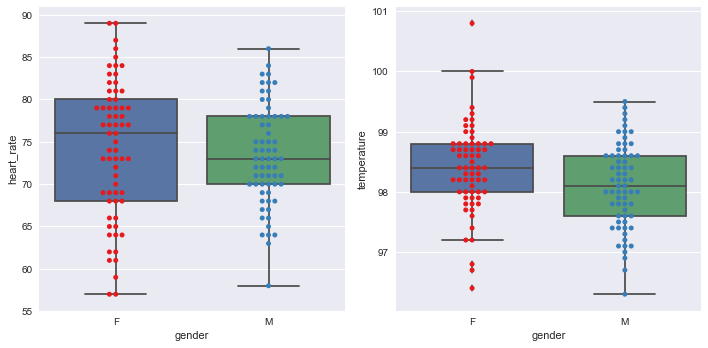

In [2]:
# initialize seaborn style for matplotlib
sns.set() 
fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.boxplot(x="gender", y="heart_rate", data=df)
sns.swarmplot(x="gender", y="heart_rate", data=df, palette="Set1");

plt.subplot(1, 2, 2)
sns.boxplot(x="gender", y="temperature", data=df)
sns.swarmplot(x="gender", y="temperature", data=df, palette="Set1");

plt.tight_layout()
plt.show()

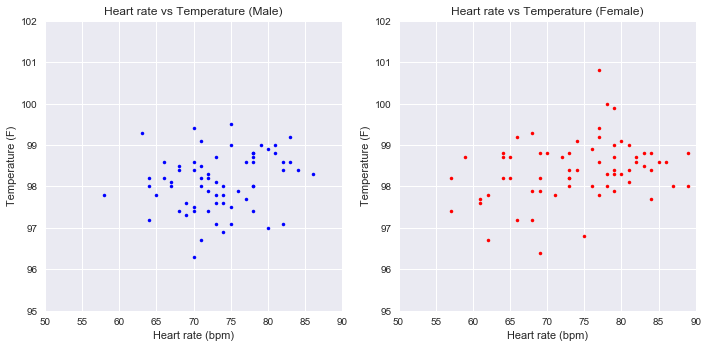

In [3]:
male_df = df.loc[df.gender == 'M']
female_df = df.loc[df.gender == 'F']

fig, ax = plt.subplots(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.plot(male_df.heart_rate, male_df.temperature, marker='.', linestyle='none', color='blue')
plt.title('Heart rate vs Temperature (Male)')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Temperature (F)')
plt.axis((50, 90, 95, 102))

plt.subplot(1, 2, 2)
plt.plot(female_df.heart_rate, female_df.temperature, marker='.', linestyle='none', color='red')
plt.title('Heart rate vs Temperature (Female)')
plt.xlabel('Heart rate (bpm)')
plt.ylabel('Temperature (F)')
plt.axis((50, 90, 95, 102))

plt.tight_layout()
plt.show()

---
## 1. Is the distribution of body temperatures normal?

Yes, the theoretical CDF and the ECDF of the data (ploted below) suggest that the body temperatures are **normally distributed**.

In [4]:
### ecdf(): returns a one-dimensional array of measurements
def ecdf(data):       
    n = len(data)                # number of data points: n
    x = np.sort(data)            # x-data for the ECDF: x    
    y = np.arange(1, n+1/n) / n  # y-data for the ECDF: y
    return x, y

In [5]:
### Compute summary statistics
mean    = np.mean(df.temperature) 
std     = np.std(df.temperature) 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> derived samples = 5000


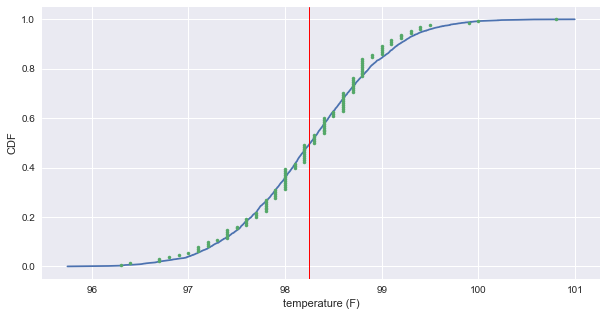

In [6]:
### Simulate a larger dataset with the same mean and std deviation to plot ECDF and later PDF
samples = np.random.normal(mean, std, size=5000) 
x, y    = ecdf(df.temperature) 
x_theor, y_theor = ecdf(samples) 

print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> derived samples =', len(samples))

### Plot ECDF
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(x_theor, y_theor) 
plt.plot(x, y, marker='.', linestyle='none') 
plt.axvline(mean, color='r', linewidth=1)
plt.xlabel('temperature (F)') 
plt.ylabel('CDF') 
plt.show() 

>>> mean    = 98.24923076923078
>>> std dev = 0.7303577789050377
>>> derived samples = 5000


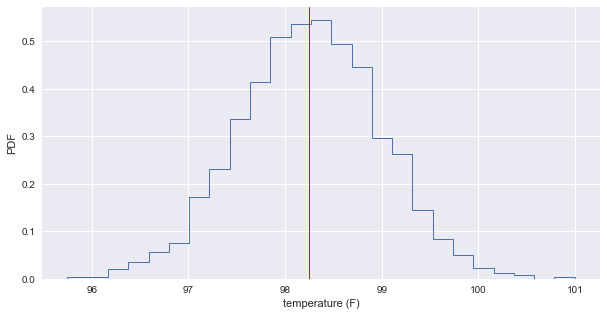

In [7]:
print('>>> mean    =', mean)
print('>>> std dev =', std)
print('>>> derived samples =', len(samples))

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
result = plt.hist(samples, bins=25, normed=True, histtype='step', linewidth=1)
plt.axvline(mean, color='r', linewidth=1)

plt.xlabel('temperature (F)')
plt.ylabel('PDF')
plt.show()

In a normal distribution, the **mean** and the **median** have always the same value. In this particular case, they are so close to each other that I believe we can say that it is a normal distribution.

In [8]:
print('>>> mean    = %.3f' % np.mean(df.temperature))
print('>>> median  = %.3f' % np.median(df.temperature))

>>> mean    = 98.249
>>> median  = 98.300


On the other hand, in a *perfectly symmetrical bell curve*, the **mean**, **median** and **mode** are all the same value. However, this is not the case with the distribution of body temperatures. Even though the mean and median are relatively close values, the mode is not:

In [9]:
import scipy
print('>>> mean    = %.3f' % np.mean(df.temperature))
print('>>> median  = %.3f' % np.median(df.temperature))
print('>>> mode    = %.3f' % scipy.stats.mode(df.temperature)[0][0])

>>> mean    = 98.249
>>> median  = 98.300
>>> mode    = 98.000


The summary statistics in table below suggests only one outlier, value 100.8, easilly spotted in the boxplot above.

Almost all observations are within 2.5 standard deviations of the mean. Based on this evidence, the normality assumption seems reasonable:

In [10]:
print('>>> Range of values for 2.5 std dev: [', np.mean(df.temperature)-2.5, ', ', np.mean(df.temperature)+2.5, ']')

summary_df = pd.DataFrame({ 'samples' : df.temperature.shape[0],
                            'mean'    : np.mean(df.temperature),
                            'std dev' : np.std(df.temperature),
                            'min Temp': df.temperature.min(),
                            'max Temp': df.temperature.max() }, 
                          index=[0])

# specify columns orders
summary_df = summary_df[['samples', 'mean', 'std dev', 'min Temp', 'max Temp']]

# hide index when display the table
from IPython.display import HTML 
HTML(summary_df.to_html(index=False))

>>> Range of values for 2.5 std dev: [ 95.74923076923078 ,  100.74923076923078 ]


samples,mean,std dev,min Temp,max Temp
130,98.249231,0.730358,96.3,100.8


Another confirmation of the normal distribution comes from the **Shapiro-Wilk** normality test. It provides a good evidence that for these 5000 samples the null hypothesis is true: it is a normal distribution.

In [11]:
print(scipy.stats.shapiro(df.temperature)) # Outputs: (statistic test, p-value)

(0.9865769743919373, 0.2331680953502655)


---
## 2. Is the sample size large? Are the observations independent?

**Yes** and **yes**. Several [authors](https://www.researchgate.net/post/What_is_the_rationale_behind_the_magic_number_30_in_statistics) suggests that a sufficiently large sample size must have at least 30 samples. Even though there are authors that say that 20 or 50 are enough, there's no formal proof that validates any of these magic numbers. The fact that our sample size is 130 and much larger then the recommended sizes, is a good indication that 130 samples are more than enough.

Another indication that this a sufficiently large dataset comes from comparing the mean temperatures of this dataset (98.25 F) with the original dataset (98.6 F). There's a reduction of the mean by less than **0.4%** on these datasets, which is a pretty small change to have any dramatic effect on our statistical analysis.

In [12]:
print('>>> Sample size =', df.shape[0])

>>> Sample size = 130


Two observations are said to be **independent** if the occurrence of one provides no information about the occurrence of the other. As far as we can tell from the exercise and searching online about Carl Wunderlich's work, these observations weren't made on the same person (over time) Therefore, it makes sense to assume **they are independent observations**, probably gathered from hospital patients where he was a physician.

## 3. Is the true population mean really 98.6 degrees F?

> **First, a bootstrap hypothesis test:**

In [13]:
# Generates boostrap replicates for N tests
def gen_bootstrap_replicates(data, n, func):
    bs_replicates = np.empty(n)
    
    for i in range(n):
        bs_sample = np.random.choice(data, size=len(data))
        bs_replicates[i] = func(bs_sample) # apply the 
        
    return bs_replicates

>>> Bootstrap replicates (mean) = 98.25


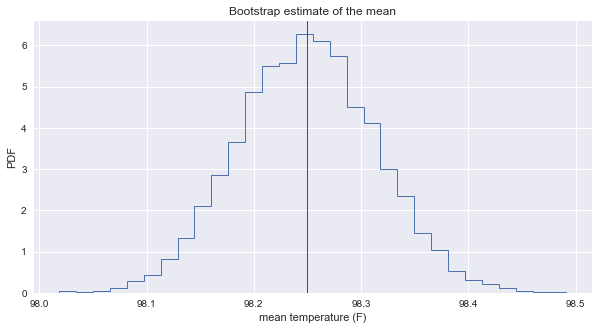

In [14]:
### Compute the approximate PDF of the mean temperature we would expect if we performed the measurements again.
bs_replicates_mean = gen_bootstrap_replicates(df.temperature, 10000, np.mean)
#print(bs_replicates_mean[:5]) # print head

bs_rep_mean = np.mean(bs_replicates_mean)
print('>>> Bootstrap replicates (mean) = %.2f' % bs_rep_mean)

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(bs_replicates_mean, bins=30, normed = True, histtype='step', linewidth=1)
plt.axvline(bs_rep_mean, color='r', linewidth=1)
plt.title('Bootstrap estimate of the mean')
plt.xlabel('mean temperature (F)')
plt.ylabel('PDF')
plt.show()

To summarise this graphical result, we compute the 95% confidence interval of the means:

In [15]:
# if we repeated measurements over and over again, p% of the observed values would stay within the p% confidence interval
print('>>> Bootstrap confidence intervals: ', np.percentile(bs_replicates_mean, [2.5, 97.5]))

>>> Bootstrap confidence intervals:  [ 98.12615385  98.37538462]


**Hypothesis**: is the population mean of the bootstrap replicates really the same as in the original dataset?

**Most likely!** There is always a fluctuation from one sample of the original dataset to another, and it is unlikely that the sample mean will be exactly the same between them or even exactly equal to the original dataset. The difference between the bootstrap replicates mean and the population mean of the dataset could be due to sampling variation.

After computing the bootstrap confidence intervals for the mean, we have a 95% confidence that the average temperature stays between **[98.1, 98.4] F**. It's important to note that the upper threshold value is only 0.02% away from the true population mean (98.6 F). Given that the distance between them is only a fraction of 1% of the mean, it seems likely that the population mean of the original dataset really was 98.6 F.

> **Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?**

This is a typical **two-sample** (a.k.a. **two-sided**) hypothesis test! Why? Because we are interested in learning if the mean is different than 98.6 F. 

To characterize something as "being different", we must perform a *not-equal-to* comparison that employs two *relacional operators* that helps evaluate this condition: 

- A value that is considered *different* from 98.6 F is a value that is *lesser than* 98.6;
- A value that is considered *different* from 98.6 F can also be a value that is *greater than* 98.6;

A **one-sample** test would perform only one of these comparisons. Therefore, it wouldn't be sufficient to answer the question.

#### Therefore, the hypothesis we want to test is:

- *H0*: The mean of the population is 98.6 F; (`µ = 98.6`);
- *HA*: The mean of the population is different from 98.6 F; (`µ <> 98.6`);

So in practice, `µ <> 98.6` is evaluated as: (`µ < 98.6`, or `µ > 98.6`).

> * **In this situation, is it appropriate to use the $t$ or $z$ statistic?**

The answer is ** *z* statistic**! 

- The **Z-test** is used to compare the population mean against a sample or compare the population mean of two distributions with a sample size greater than 30, when std deviations are known;
- The **T-test** is used to compare the population mean against a sample, or compare the population mean of two distributions with a sample size less than 30, or when you don't know the population's standard deviation.

We should use the **Z-test** and the normal probability table (z-score) when:
- When the dataset has a sufficiently large amout of samples (>= 30);
- When the data has a normal distribution;

Since the Z-test requires the population std deviation, which we don't have, we approximate it using the sample std deviation: [this is OK](https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/z-statistics-vs-t-statistics) since our sample size is >= 30.

In [16]:
# Z-test
def z_test(sample_mean, sample_sz, sample_std, pop_mean):
    # Standard Error
    SE = sample_std / np.sqrt(sample_sz)          
    print('>>> std error  =', SE)

    # Z-Score (the z-statistic)
    z_score = (pop_mean - mean) / SE
    print('>>> z-score    =', z_score)   
    
    p = -2 * scipy.stats.norm.cdf(-np.abs(z_score))
    print('>>> p-value    =', p)

In [17]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
sample_sz = df.temperature.shape[0]
pop_mean = 98.6
z_test(sample_mean, sample_sz, sample_std, pop_mean)

>>> std error  = 0.0640566146952
>>> z-score    = 5.47592520208
>>> p-value    = -4.35231516588e-08


With a **significance level** of **0.05** (i.e *alpha*), the critical values of `z_score` are **-1.96** and **+1.96**. That means that we reject *H0* if `z_score < -1.96` or `z_score > +1.96`.

The final statistical decision is to reject the null hypothesis (*H0*) because:
- The `z_score` 5.47 is greater than 1.96;
- The `p-value` is much smaller than the alpha (0.05);

Thus, the data favors the alternative hypothesis (*HA*), that says that the means are different.

> * **Now try using the other test. How is the result be different? Why?**

According to [Amulya Aankul](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f), the **t-test** (aka. Student’s T Test) compares two averages (means) and tells if they are different from each other. The t-test also tells how significant the differences are. In other words, it says if those differences could have happened by chance.

The **t-score** is the ratio of the difference between two groups and the difference within the groups. The larger the t-score, the more difference there are between groups. The smaller the t-score, the more similar the groups are. A t-score of 3 means that the groups are three times as different from each other as they are within each other. 

After analysing the data below, the final statistical decision is to **reject the null hypothesis (H0)** because:
- The `t_score` of **5.47** implies that the means are very distant from each other. This is a strong evidence that the mean temperature of the samples is different from the original population;
- Comparing the `t_score` with the `p-value` makes it clear that the `p-value` is a lot smaller. 

The test concludes that there is a statistical significant difference between the two means.

In [18]:
# T-test
def t_test(sample_mean, sample_sz, sample_std, pop_mean):
    # Standard Error
    SE = sample_std / np.sqrt(sample_sz)          
    print('>>> std error  =', SE)

    # T-Score (the t-statistic)
    t_score = (pop_mean - mean) / SE
    print('>>> t-score    =', t_score)

    # Compare with the critical t-value
    degrees_of_freedom = sample_sz - 1
    p = 1 - scipy.stats.t.cdf(t_score, df=degrees_of_freedom) #p-value after comparison with the t 
    print('>>> p-value    =', p)

In [19]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
sample_sz = df.temperature.shape[0]
pop_mean = 98.6
t_test(sample_mean, sample_sz, sample_std, pop_mean)

>>> std error  = 0.0640566146952
>>> t-score    = 5.47592520208
>>> p-value    = 1.09437323204e-07


## 4. Draw a small sample of size 10 from the data and repeat both frequentist tests
> Which one is the correct one to use?

Because of the small size of this dataset, we can only perform the **t-test** for reasons explained earlier.

>>> Bootstrap replicates (mean) = 98.25


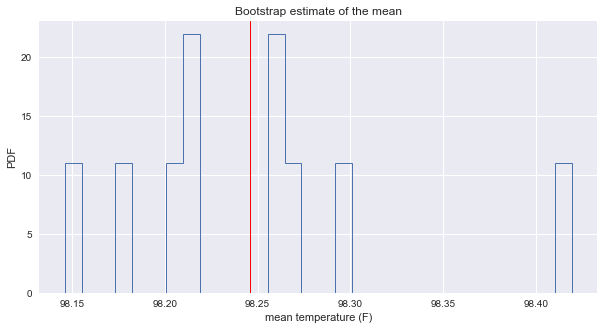

>>> std error  = 0.0227529177529
>>> t-score    = 15.416450522
>>> p-value    = 4.44557451962e-08


In [20]:
sample_sz = 10
bs_replicates_mean = gen_bootstrap_replicates(df.temperature, sample_sz, np.mean)
sample_mean = np.mean(bs_replicates_mean)
print('>>> Bootstrap replicates (mean) = %.2f' % sample_mean)

### Plot PDF
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(bs_replicates_mean, bins=30, normed = True, histtype='step', linewidth=1)
plt.axvline(sample_mean, color='r', linewidth=1)
plt.title('Bootstrap estimate of the mean')
plt.xlabel('mean temperature (F)')
plt.ylabel('PDF')
plt.show()

### T-test
sample_std = np.std(bs_replicates_mean)
pop_mean = 98.6
t_test(sample_mean, sample_sz, sample_std, pop_mean)

> What do you notice? What does this tell you about the difference in application of the t and z statistic?

The test results makes it clear: the extremelly high value of `t_score` shows that the sample mean and the population mean are very distant from each other. Also, because the `p-value` is much smaller than the *significance level* (0.05), the results effectivelly **reject the null hyphotesis** (*H0*) in favor of *HA*, indicating that the means are probably different.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?
> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.

> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

The answer is **it depends**! The confidence interval chosen and the outlier detection method that is preferred can have a dramatic change on the limits that define the normal temperature.

Below we compute the 95% and 99.7% confidence intervals for 10000 bootstrap replicates of the mean to illustrate how subtle sometimes these variations can be:

In [21]:
bs_replicates_mean = gen_bootstrap_replicates(df.temperature, 10000, np.mean)
bs_rep_mean = np.mean(bs_replicates_mean)
print('>>> Bootstrap replicates (mean) = %.2f' % bs_rep_mean)

range95 = np.percentile(bs_replicates_mean, [2.5, 97.5])
range95_outliers_count = len(df.temperature[df.temperature < range95[0]].values) + len(df.temperature[df.temperature > range95[1]].values)
print('>>> Bootstrap 95%   CI:', range95)
print('>>> Number of outliers found within the 95% CI:', range95_outliers_count) 

range99 = np.percentile(bs_replicates_mean, [0.15, 99.85])
range99_outliers_count = len(df.temperature[df.temperature < range99[0]].values) + len(df.temperature[df.temperature > range99[1]].values)
print('>>> Bootstrap 99.7% CI:', range99)
print('>>> Number of outliers found within the 99.7% CI:', range99_outliers_count) 

>>> Bootstrap replicates (mean) = 98.25
>>> Bootstrap 95%   CI: [ 98.12615385  98.37538462]
>>> Number of outliers found within the 95% CI: 115
>>> Bootstrap 99.7% CI: [ 98.06615385  98.43307692]
>>> Number of outliers found within the 99.7% CI: 103


When a value falls below or above the 95% CI or the 99.7% CI, the value is considered to be abnormal (or an outlier):
- According to the 95%   CI, temperatures below **98.12** or above **98.37** are outliers.
- According to the 99.7% CI, temperatures below **98.05** or above **98.43** are outliers.

However, there's a number of different methods that can be used to detect outliers. Another outlier detection technique, very popular and mostly known for it's simplicity and robustness, is the **IQR method**. Created by John Tukey, the pioneer of exploratory data analysis, its the method behind *boxplots* and is what makes it easy to spot outliers. In fact, in the beginning of this report a boxplot is displayed and its very easy to spot a few potential abnormal values.

For education purposes, we implement a naive IQR (Inter-Quartile Range) function that returns the lower and upper limits of the values considered to be normal:

In [22]:
### Inter-Quartile Range for detecting outliers
def iqr_outlier_range(data):
    median = np.median(data)
        
    lower_quartile = np.mean(data[data < median])
    upper_quartile = np.mean(data[data > median])
    
    iqr = upper_quartile - lower_quartile # iqr range
    
    min_lim = lower_quartile - 1.5 * iqr
    max_lim = upper_quartile + 1.5 * iqr
    return (min_lim, max_lim)    

In [23]:
min_limit, max_limit = iqr_outlier_range(df.temperature)
print('>>> Lowest  acceptable/normal temperature: %.2f' % min_limit)
print('>>> Highest acceptable/normal temperature: %.2f' % max_limit)

print('>>> Abnormal temperatures found below the acceptable limit:', df.temperature[df.temperature < min_limit].values)
print('>>> Abnormal temperatures found above the acceptable limit:', df.temperature[df.temperature > max_limit].values)

>>> Lowest  acceptable/normal temperature: 95.90
>>> Highest acceptable/normal temperature: 100.63
>>> Abnormal temperatures found below the acceptable limit: []
>>> Abnormal temperatures found above the acceptable limit: [ 100.8]


It's clear that this method has a more permissive range of values considered "normal". In fact, listing all the outliers from the samples dataset shows only one result: **100.8**.

## 6. Is there a significant difference between males and females in normal temperature?
**Yes, there is!** 

To answer this question we employ a **two-sample T-test** since we want to compare two groups. The **null hypothesis** represents the case of no difference between the groups:
- *H0*: There is no difference in average temperature between males and females; (µm −µf = 0)
- *HA*: There is some difference in average temperates between males and females (µm − µf <> 0).

Because of the comparison required in *HA*, this is a **two-sided** test. 

First, we observe that there is a small difference between the sample means of male/female temperatures of just **~0.29%**. This information is our *point estimate*.

>>> Male    sample sz= 65   mean= 98.10   std dev= 0.6987557623265908
>>> Female  sample sz= 65   mean= 98.39   std dev= 0.7434877527313665
>>> Male/Female mean difference = 0.29


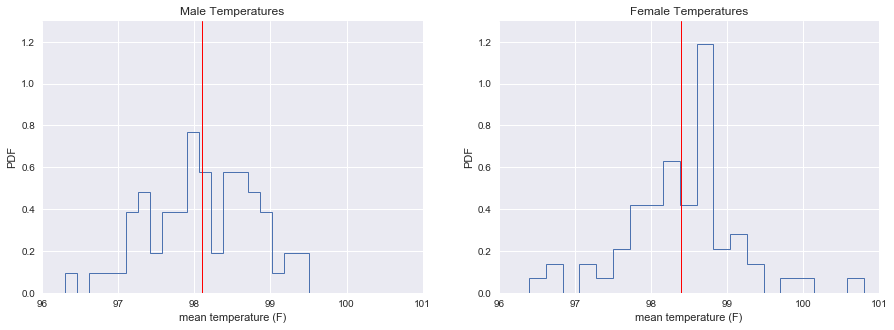

In [24]:
male_temp_df = df[df.gender == 'M'].temperature
m_mean = np.mean(male_temp_df)
m_std = np.std(male_temp_df, ddof=1)
print('>>> Male    sample sz=', male_temp_df.shape[0], '  mean= %.2f' % m_mean, '  std dev=', m_std)

female_temp_df = df[df.gender == 'F'].temperature
f_mean = np.mean(female_temp_df)
f_std = np.std(female_temp_df, ddof=1)
print('>>> Female  sample sz=', female_temp_df.shape[0], '  mean= %.2f' % f_mean, '  std dev=', f_std)

print('>>> Male/Female mean difference = %.2f' % abs(m_mean - f_mean))

fig, ax = plt.subplots(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.hist(male_temp_df, bins=20, normed = True, histtype='step', linewidth=1)
plt.title('Male Temperatures')
plt.xlabel('mean temperature (F)')
plt.ylabel('PDF')
plt.axis((96, 101, 0, 1.3))
plt.axvline(m_mean, color='r', linewidth=1)

plt.subplot(1, 2, 2)
plt.hist(female_temp_df, bins=20, normed = True, histtype='step', linewidth=1)
plt.title('Female Temperatures')
plt.xlabel('mean temperature (F)')
plt.ylabel('PDF')
plt.axis((96, 101, 0, 1.3))
plt.axvline(f_mean, color='r', linewidth=1)

plt.show()

Then, we compute the **standard error** of the point estimate to help inform us if the difference between the samples 
 might be explained by how spread out the data is:

In [25]:
# assert that both samples have the same size
assert(male_temp_df.shape[0] == female_temp_df.shape[0])
n = female_temp_df.shape[0] 
 
# Calculate group variability: how much variability is in the samples
SE = np.sqrt( (m_std**2 / n) + (f_std**2 / n) )
print('>>> Std Error =', SE)

>>> Std Error = 0.12655395042


Next, we calculate the `t-score` and `degrees_of_freedom`. Remember to use the smaller of the sample sizes as the **degrees of freedom**:

In [26]:
# Calculate t-value
t_score = (f_mean - m_mean) / SE
print('>>> t-score= %.4f' % t_score)

### degrees of freedom (DOF): the number of scores used after calculation
# simple DOF: the sample size of the smaller of the 2 groups -1
if (male_temp_df.shape[0] < female_temp_df.shape[0]):
    degrees_of_freedom = male_temp_df.shape[0]-1;
else:
    degrees_of_freedom = female_temp_df.shape[0]-1;

### optional: adjust the DOF to be as accurate as the implementation of scipy.stats.ttest_ind()
eq1 = ( ((m_std**2 / n)+(f_std**2 / n)) ** 2 )
eq2 =  ( (m_std**2 ** 2) / ((n ** 2) * degrees_of_freedom)) + ((f_std**2 ** 2) / ((n ** 2) * degrees_of_freedom) )
degrees_of_freedom = eq1 / eq2
    
print('>>> degrees_of_freedom=', degrees_of_freedom)  

>>> t-score= 2.2854
>>> degrees_of_freedom= 127.5103008303909


Searching the [T-table](http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf) reveals that `t_score=2.30` falls between the tail areas of **0.02** and **0.05** when using `degrees_of_freedom=64`, which is equivalent to the **95%** and **98%** confidence levels.

In [27]:
# Finally, compute the probability of getting a t_score as large or larger than 2.303 or as small or smaller than -2.303
confidence_level = scipy.stats.t.cdf(t_score, df=degrees_of_freedom)
p_value = (1 - confidence_level) * 2     # for a two-tailed test, multiply the resulting p-value by 2
print('>>> p_value= %.4f' % p_value)

>>> p_value= 0.0239


This `p-value` is smaller than the **significance value** (0.05), so the test concludes that we must **reject the null hypothesis** in favor of the alternative hypothesis: there is some difference in temperature between males and females.

As a final step, we check the validity of our results by comparing them to the results we get from SciPy T-test implementation:

In [28]:
scipy_t_score, scipy_p_value = scipy.stats.ttest_ind(female_temp_df, male_temp_df)

print('>>>    My t-score=', t_score, '    My p-value=', p_value)
print('>>> SciPy t-score=', scipy_t_score, ' SciPy p-value=', scipy_p_value)

# np.isclose() is a great way to compare floats: compare just the first 5 decimal places for equality
print('>>> Is the t-score almost identical? ', np.isclose(t_score, scipy_t_score, rtol=1e-05, atol=1e-05, equal_nan=False))
print('>>> Is the p-value almost identical? ', np.isclose(p_value, scipy_p_value, rtol=1e-05, atol=1e-05, equal_nan=False))

>>>    My t-score= 2.28543453817     My p-value= 0.023938264183
>>> SciPy t-score= 2.28543453817  SciPy p-value= 0.0239318831224
>>> Is the t-score almost identical?  True
>>> Is the p-value almost identical?  True
